In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Library

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# Confusion Matrix

In [3]:
def plot_confusion_matrix(cm, classes):
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  thresh = cm.max() / 2.
  for i in range (cm.shape[0]):
    for j in range (cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

# ROC AUC Curve

In [4]:
def plotROC(y_test, y_pred):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  plt.figure(figsize=(4,4))
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr,tpr, color='red',label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

# Precision and Recall Curve

In [5]:
def plotPrecisionRecall(y_test, y_pred):
  precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
  plt.figure(figsize = (4,4))
  plt.plot(recall, precision)
  plt.plot([0, 1], [0.5, 0.5], linestyle = '--')
  plt.axis('tight')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.show()

#Section 01:- Reading Data and Checking the Meta information

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4.2/CSE 4214 - Pattern Recognition Lab/Project/drugAddiction.csv', encoding='cp1252')
df.describe()

,Age,Gender,Education,Enjoyable with-,Live with,Conflict with law,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,Suicidal thoughts,Family relationship,Financials of family,Addicted person in family,no. of friends,Withdrawal symptoms,friends’ houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
count,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211,211
unique,4,2,5,3,2,2,7,3,2,17,2,3,4,3,3,3,3,2,2,3,3,2,2,3,2,4
top,between 22 to 35 years,Male,Undergraduate,I have no idea,With Family/Relatives,No,Should avoid,Friends,Yes,Depression/ inferiority/Guilt,No,Satisfactory,Medium,No,Many (more than 5),I have no idea,Sometimes,Yes,No,No,"Yes, every day.",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable
freq,122,142,132,122,130,159,83,127,109,44,143,121,107,152,139,110,111,132,184,125,90,114,134,83,157,110


# Section 02:- Data Visualization

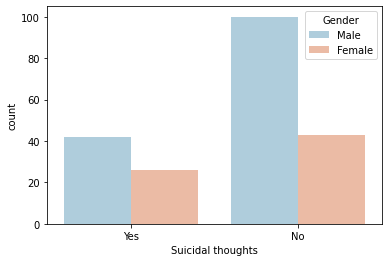

In [ ]:
sns.countplot(x='Suicidal thoughts',hue='Gender',data=df,palette='RdBu_r')
#From the below plot we see suicidal thoughts are more in Male compared to Female.

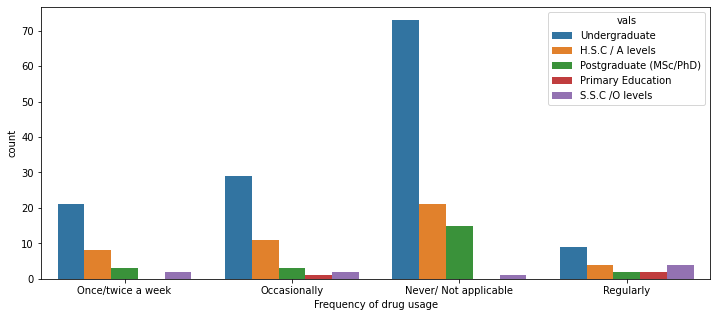

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Education'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)
#From the below plot we see Regular usage of Drug is more common in undergraduates than compared to others

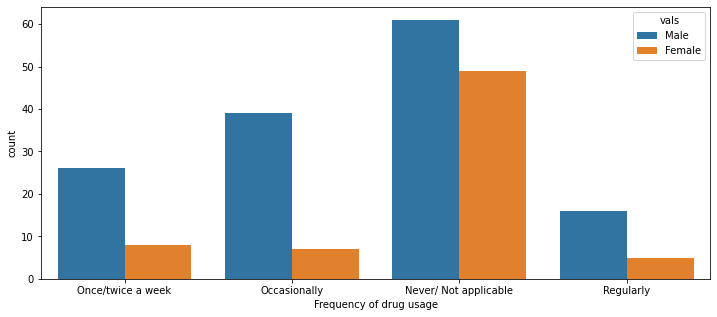

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Gender'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)
#From the above plot we see Regularly usage of drug is more in Male compared to Female.

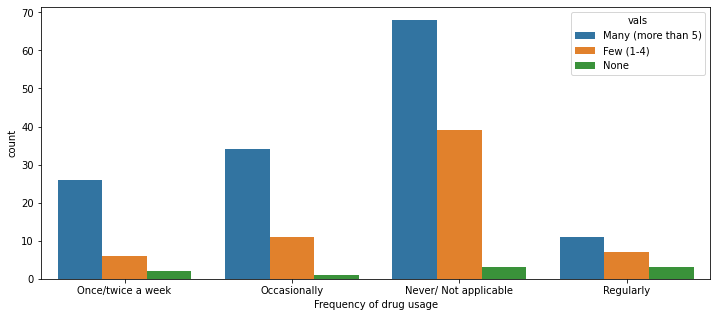

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['no. of friends'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)
#From the below plot we see Regularly usage of drug is more when person is having more than 5 friends.

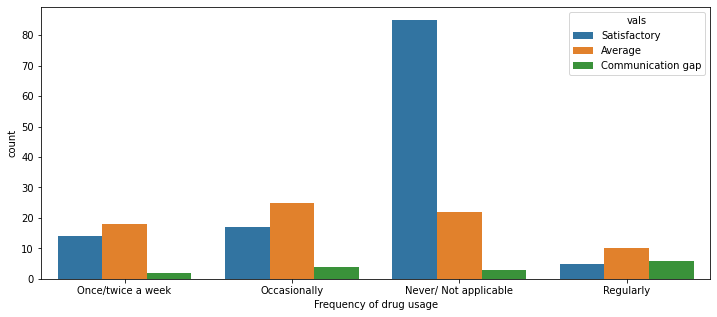

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Family relationship'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)
#From the below plot we see Regularly usage of drug is more in person whose Family relationship is average.

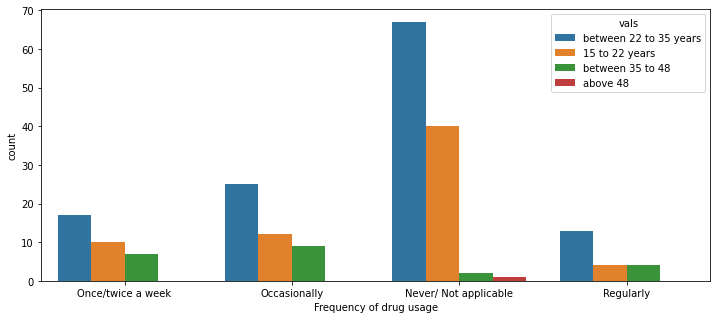

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Age'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)
#From the below plot we see Regularly usage of drug is more between age group of 22 to 35

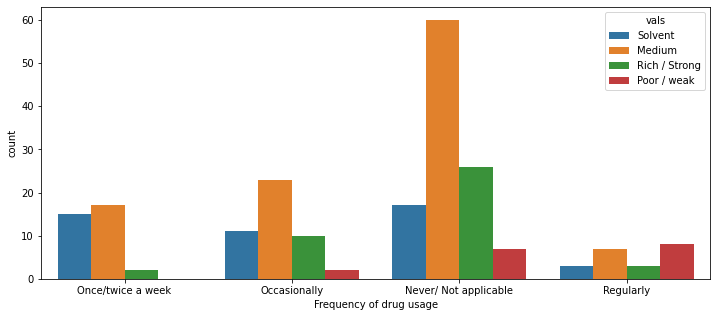

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Financials of family'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)
#From the below plot we see Regularly usage of drug is more in people belonging to Poor/weak section of society

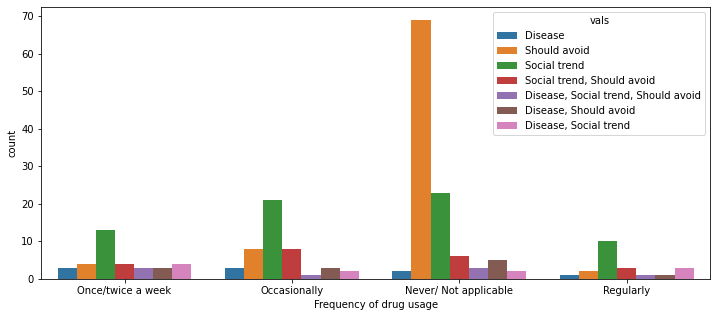

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Motive about drug'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)
#From the below plot we see Regularly usage of drug is more in people who are influenced by social trends

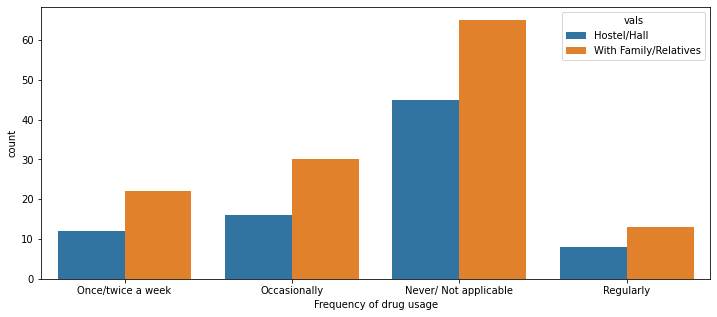

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Live with'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)
#From the below plot we see Regularly usage of drug is more in people who stay with their Family

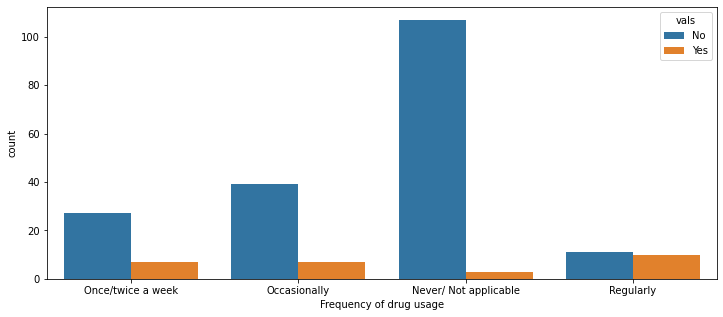

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Case in court'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)

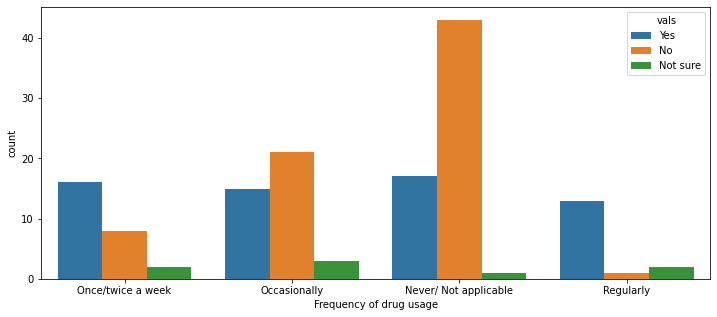

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Living with drug user'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[df['Gender']=='Male'])
#From the below plot we see Regularly usage of drug is more in MALE if their friends are used to the drugs

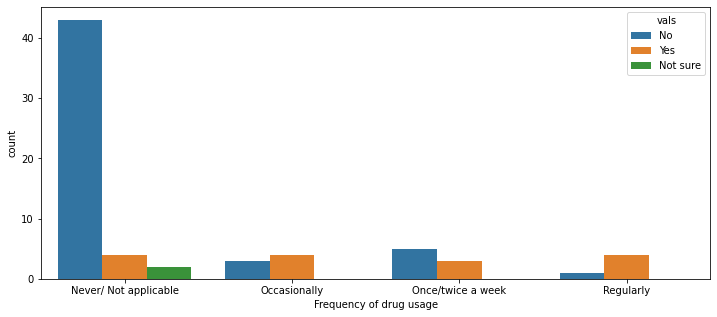

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Living with drug user'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])
#From the below plot we see Regularly usage of drug Same like Male's Female's are influenced if they are in toch with friend who is regularly using it.

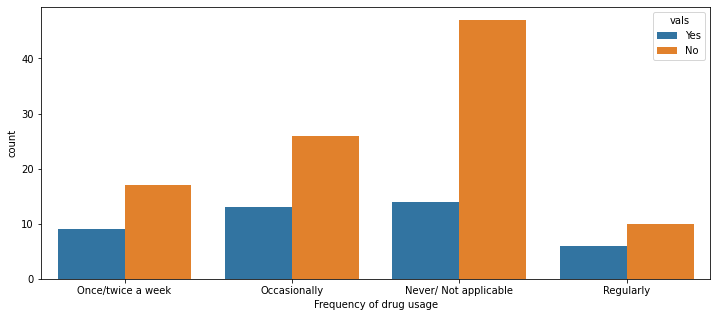

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Suicidal thoughts'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])
#From the below plot we see Suicidal Ideation is less in Male who are Regularly users of drug

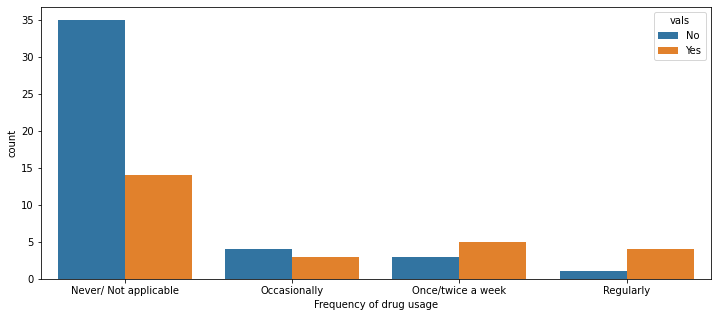

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Suicidal thoughts'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])
#From the below plot we see Suicidal Ideation is MORE in Female who are Regular users of drug

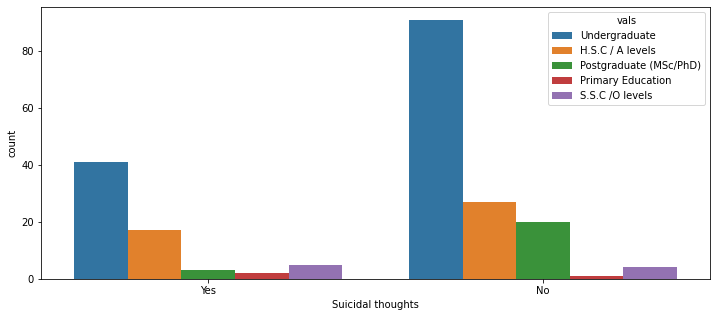

In [ ]:
df01 = df.melt( id_vars=['Suicidal thoughts'],value_vars=['Education'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Suicidal thoughts", hue='vals', data=df01)
#From the below plot we see Suicidal Ideation is MORE if the person is Under graduate

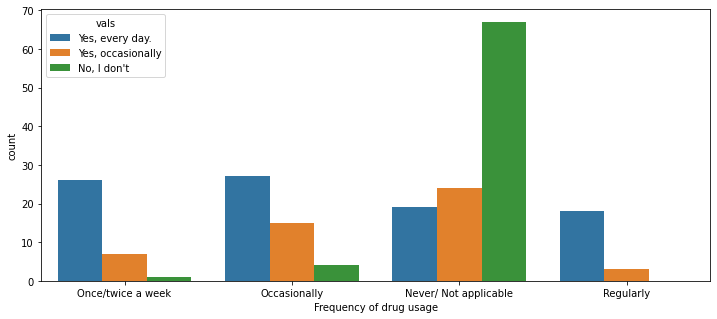

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Smoking'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)
#From the below plot we see Regular usage is more in people who are regular/everyday smokers, Intresting fact from the plot is if the person dont smoke he/she may not get in to the Regular usage of drug

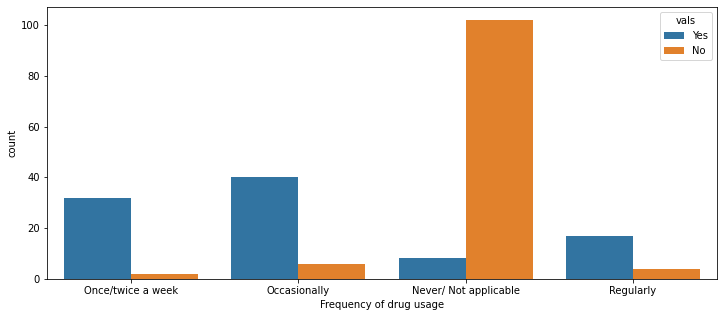

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Ever taken drug'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01)
#Regulary usage of Drug from the above plot is bit contradictory since few people have answered Ever taken drug to NO but still they have answered as they are regular users of Drug

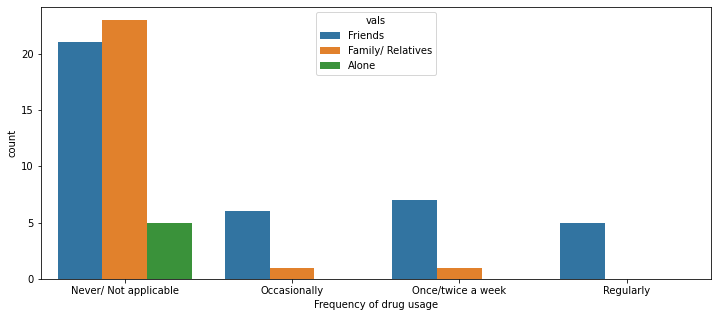

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Spend most time'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])
#From the below plot we see Regular usage of drug in Female spends most of time with Friends,One intresting fact to notice is if you spend most of time with Family/Relatives you are most likely not get addicted

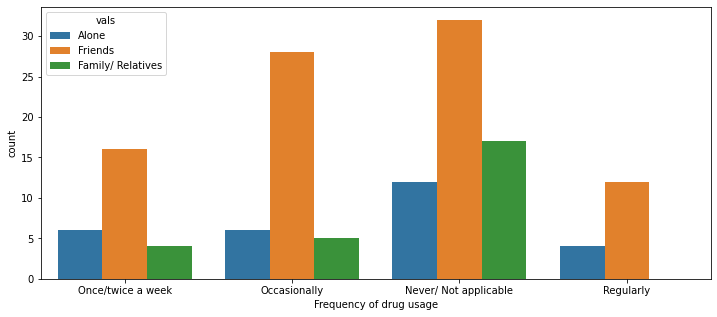

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Spend most time'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])
#From the below plot we see Regular usage of drug in Male spends most of time with Friends.One intresting fact to notice is if you spend most of time with Family/Relatives you are most likely not get addicted

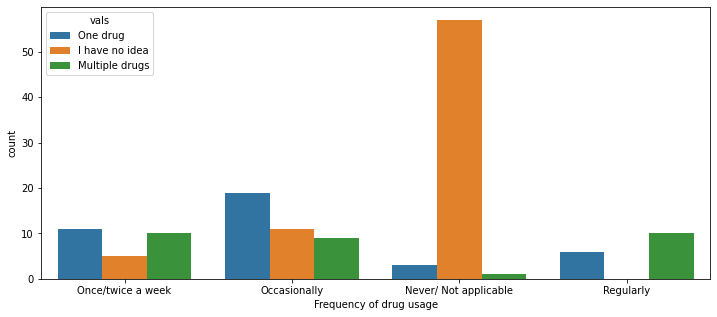

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Enjoyable with-'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])
#From the below plot we see Regular usage of drug in Male are in to usage of multiple drugs

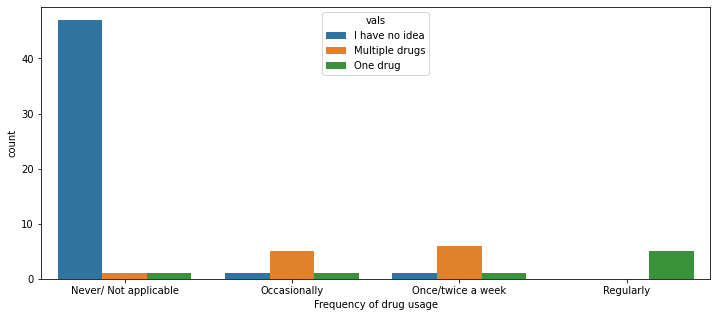

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Enjoyable with-'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])
#From the below plot we see Regular usage of drug in Female are in to usage of ONE drug

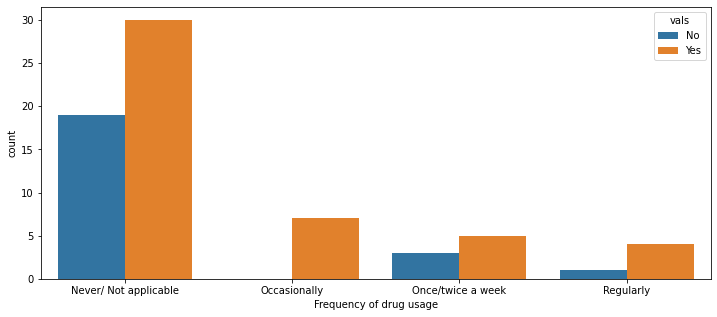

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Satisfied with workplace'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])
#From the below plot we see Regular usage of drug in Female those who are Satisfied with their work in work place

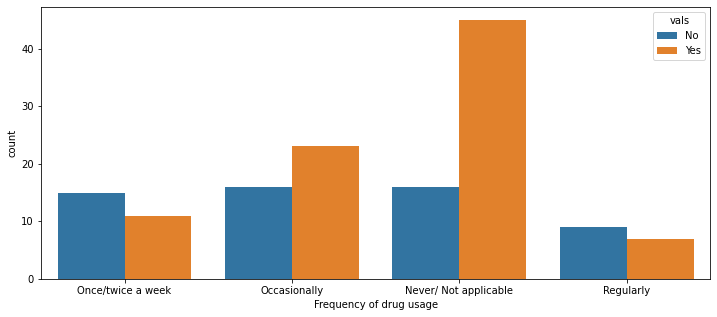

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Satisfied with workplace'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])
#From the below plot we see Regular usage of drug in Male are those who are NOT Satisfied with their work in work place

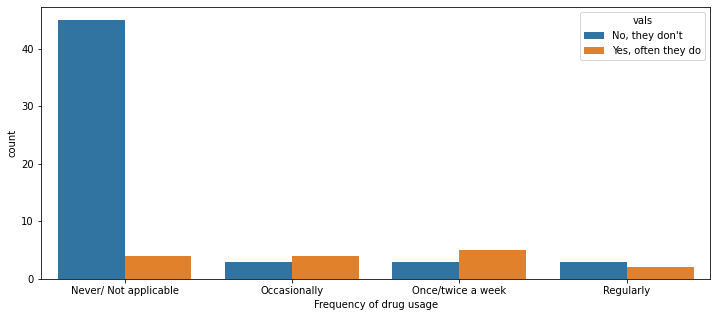

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Friends influence'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Female"))])
#From the below plot we see Regular usage of drug in Female are those who are NOT influenced by their friends

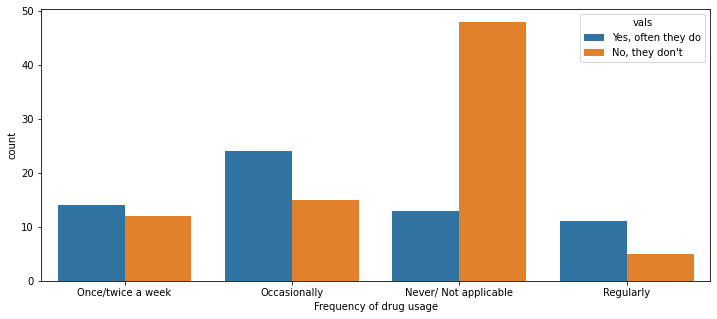

In [ ]:
df01 = df.melt( id_vars=['Frequency of drug usage'],value_vars=['Friends influence'], var_name='cols',  value_name='vals')
plt.figure(figsize=(12,5))
g =sns.countplot(x="Frequency of drug usage", hue='vals', data=df01[((df['Gender']=="Male"))])
#From the above plot we see Regular usage of drug in Male are those who are influenced by their friends

#Section 03:- Data Preprocessing

In [ ]:
df[df.duplicated()].count()

Age                               6
Gender                            6
Education                         6
Enjoyable with-                   6
Live with                         6
Conflict with law                 6
Motive about drug                 6
Spend most time                   6
Failure in life                   6
Mental/emotional problem          6
Suicidal thoughts                 6
Family relationship               6
Financials of family              6
Addicted person in family         6
no. of friends                    6
Withdrawal symptoms               6
friends’ houses at night          6
Satisfied with workplace          6
Case in court                     6
Living with drug user             6
Smoking                           6
Ever taken drug                   6
Friends influence                 6
If chance given to taste drugs    6
Easy to control use of drug       6
Frequency of drug usage           6
dtype: int64

##One hot Encoding the columns

In [ ]:
dfclassification=df.copy()
dfclassification['Suicidal thoughts']=dfclassification[['Suicidal thoughts']].apply(lambda x:x.map({'Yes':1,'No':0}))
dfclassification['Gender']=dfclassification[['Gender']].apply(lambda x:x.map({'Male':1,'Female':0}))
dfclassification['Failure in life']=dfclassification[['Failure in life']].apply(lambda x:x.map({'Yes':1,'No':0}))

In [ ]:
mylist = list(dfclassification.select_dtypes(include=['object']).columns)
dummy1=pd.get_dummies(dfclassification[mylist],drop_first=True)
dfclassificationFinal = pd.concat([dummy1,dfclassification['Suicidal thoughts'],dfclassification['Gender'],dfclassification['Failure in life']], axis=1)
from sklearn import preprocessing
X = dfclassificationFinal.drop('Suicidal thoughts',axis=1).values
y = dfclassificationFinal['Suicidal thoughts'].values

#Section 04:- Splitting the Data Equally in to X_train and X_test(Stratified logic)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=2,stratify=y)

train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
test_0, test_1 = len(y_test[y_test==0]), len(y_test[y_test==1])
print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

>Train: 0=107, 1=51, Test: 0=36, 1=17


#Section 05:- Model Building

##Model 01:- Support Vector Machine (SVM)

Accuracy: 71.6981
Precision: 71.6981
Recall: 71.6981
F1 score: 71.6981
Cohen Kappa score: 29.5837


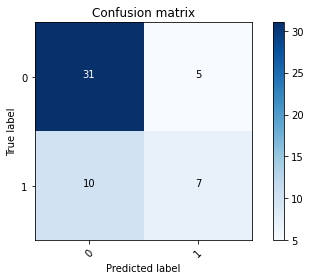

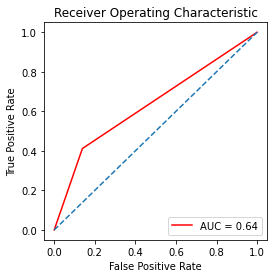

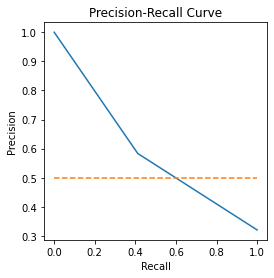

In [ ]:
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy: ' +str(round(accuracy_score(y_test, y_pred) * 100, 4)))
print('Precision: ' +str(round(precision_score(y_test, y_pred, average='micro') * 100, 4)))
print('Recall: ' +str(round(recall_score(y_test, y_pred, average='micro') * 100, 4)))
print('F1 score: ' +str(round(f1_score(y_test, y_pred, average='micro')  * 100, 4)))
print('Cohen Kappa score: ' +str(round(cohen_kappa_score(y_test, y_pred)  * 100, 4)))
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plotROC(y_test, y_pred)
plotPrecisionRecall(y_test, y_pred)

## Model 02:- Naive Bayes

Accuracy: 37.7358
Precision: 37.7358
Recall: 37.7358
F1 score: 37.7358
Cohen Kappa score: 3.5301


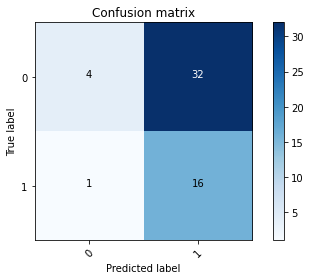

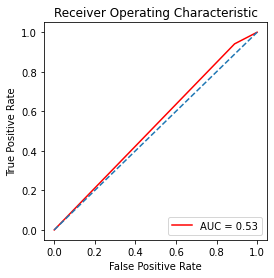

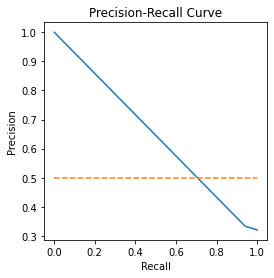

In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy: ' +str(round(accuracy_score(y_test, y_pred) * 100, 4)))
print('Precision: ' +str(round(precision_score(y_test, y_pred, average='micro') * 100, 4)))
print('Recall: ' +str(round(recall_score(y_test, y_pred, average='micro') * 100, 4)))
print('F1 score: ' +str(round(f1_score(y_test, y_pred, average='micro')  * 100, 4)))
print('Cohen Kappa score: ' +str(round(cohen_kappa_score(y_test, y_pred)  * 100, 4)))
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plotROC(y_test, y_pred)
plotPrecisionRecall(y_test, y_pred)

##Model 03:- KNN

Accuracy: 71.6981
Precision: 71.6981
Recall: 71.6981
F1 score: 71.6981
Cohen Kappa score: 29.5837


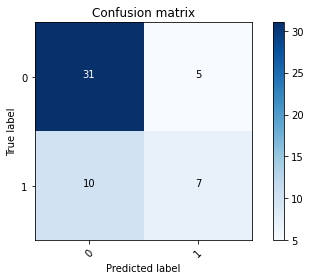

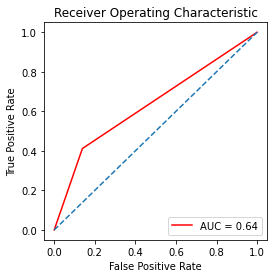

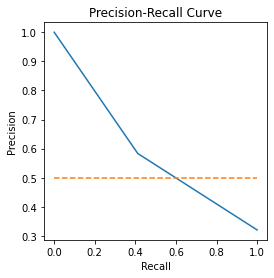

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy: ' +str(round(accuracy_score(y_test, y_pred) * 100, 4)))
print('Precision: ' +str(round(precision_score(y_test, y_pred, average='micro') * 100, 4)))
print('Recall: ' +str(round(recall_score(y_test, y_pred, average='micro') * 100, 4)))
print('F1 score: ' +str(round(f1_score(y_test, y_pred, average='micro')  * 100, 4)))
print('Cohen Kappa score: ' +str(round(cohen_kappa_score(y_test, y_pred)  * 100, 4)))
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plotROC(y_test, y_pred)
plotPrecisionRecall(y_test, y_pred)

##Model 04:- Logistic Regression

Accuracy: 81.1321
Precision: 81.1321
Recall: 81.1321
F1 score: 81.1321
Cohen Kappa score: 59.2308


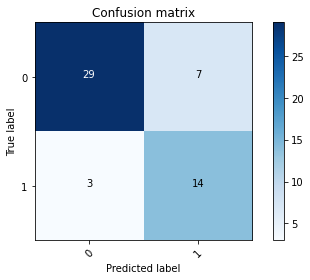

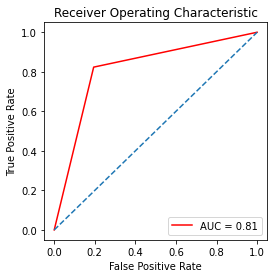

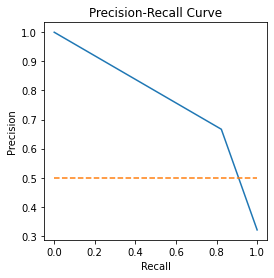

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy: ' +str(round(accuracy_score(y_test, y_pred) * 100, 4)))
print('Precision: ' +str(round(precision_score(y_test, y_pred, average='micro') * 100, 4)))
print('Recall: ' +str(round(recall_score(y_test, y_pred, average='micro') * 100, 4)))
print('F1 score: ' +str(round(f1_score(y_test, y_pred, average='micro')  * 100, 4)))
print('Cohen Kappa score: ' +str(round(cohen_kappa_score(y_test, y_pred)  * 100, 4)))
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plotROC(y_test, y_pred)
plotPrecisionRecall(y_test, y_pred)

## Model 05:- Decision Tree

Accuracy: 66.0377
Precision: 66.0377
Recall: 66.0377
F1 score: 66.0377
Cohen Kappa score: 22.0588


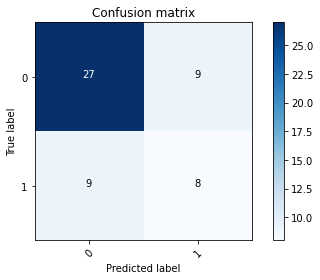

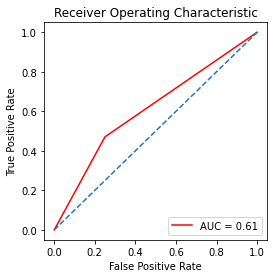

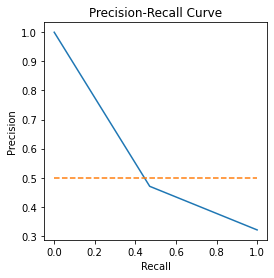

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)  
y_pred = model.predict(X_test) 
print('Accuracy: ' +str(round(accuracy_score(y_test, y_pred) * 100, 4)))
print('Precision: ' +str(round(precision_score(y_test, y_pred, average='micro') * 100, 4)))
print('Recall: ' +str(round(recall_score(y_test, y_pred, average='micro') * 100, 4)))
print('F1 score: ' +str(round(f1_score(y_test, y_pred, average='micro')  * 100, 4)))
print('Cohen Kappa score: ' +str(round(cohen_kappa_score(y_test, y_pred)  * 100, 4)))
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plotROC(y_test, y_pred)
plotPrecisionRecall(y_test, y_pred)

## Model 06:- Random Forest

Accuracy: 73.5849
Precision: 73.5849
Recall: 73.5849
F1 score: 73.5849
Cohen Kappa score: 37.4368


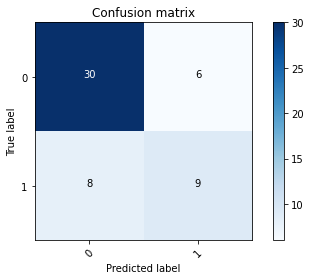

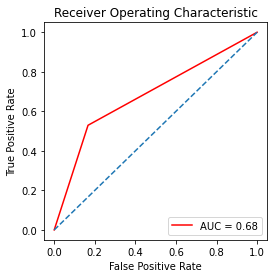

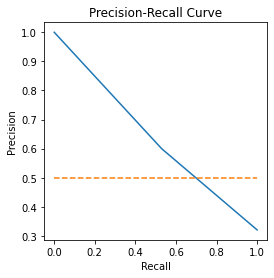

In [ ]:
model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy: ' +str(round(accuracy_score(y_test, y_pred) * 100, 4)))
print('Precision: ' +str(round(precision_score(y_test, y_pred, average='micro') * 100, 4)))
print('Recall: ' +str(round(recall_score(y_test, y_pred, average='micro') * 100, 4)))
print('F1 score: ' +str(round(f1_score(y_test, y_pred, average='micro')  * 100, 4)))
print('Cohen Kappa score: ' +str(round(cohen_kappa_score(y_test, y_pred)  * 100, 4)))
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plotROC(y_test, y_pred)
plotPrecisionRecall(y_test, y_pred)

## Model 07:- Stochastic Gradient Descent

Accuracy: 83.0189
Precision: 83.0189
Recall: 83.0189
F1 score: 83.0189
Cohen Kappa score: 63.8362


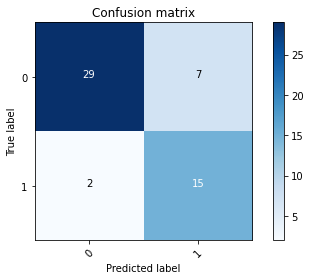

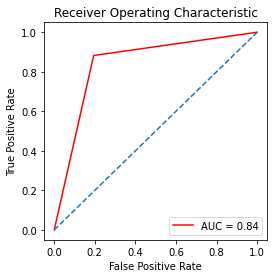

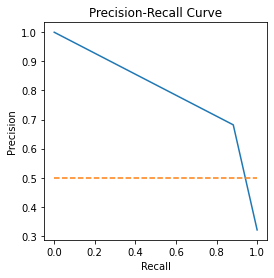

In [ ]:
model = SGDClassifier(loss="hinge", penalty="l2")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy: ' +str(round(accuracy_score(y_test, y_pred) * 100, 4)))
print('Precision: ' +str(round(precision_score(y_test, y_pred, average='micro') * 100, 4)))
print('Recall: ' +str(round(recall_score(y_test, y_pred, average='micro') * 100, 4)))
print('F1 score: ' +str(round(f1_score(y_test, y_pred, average='micro')  * 100, 4)))
print('Cohen Kappa score: ' +str(round(cohen_kappa_score(y_test, y_pred)  * 100, 4)))
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(2))
plotROC(y_test, y_pred)
plotPrecisionRecall(y_test, y_pred)

#Conclusion:-

Logistic regression & Stochastic Gradient Descent proved to be the good modal compared to others with 81% Accuracy on Test Data.